# Customer segmentation project with K-means algorithm

## What is customer segmentation?

Customer segmentation is the process of separating your customers into groups based on the certain traits (e.g. personality, interests, habits) and factors (e.g. demographics, industry, income) they share.

Segmentation offers a simple way of organizing and managing your company’s relationships with your customers. This process also makes it easy to tailor and personalize your marketing, service, and sales efforts to the needs of specific groups. This helps boost customer loyalty and conversions.

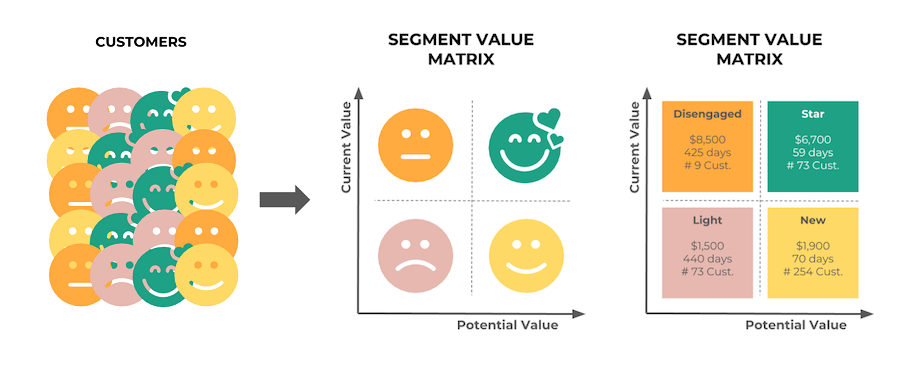

## Why segment customers?

- Learning about your customers on a deeper level so you can tailor your content to their unique needs and challenges
- Creating targeted campaigns and ads to resonate with and convert segments of customers
- Improving your customer service and customer support efforts by understanding and preparing for challenges different groups are likely to experience
- Increasing customer loyalty with customized content and interactions
- Understanding who your most valuable customers are and why
- Communicating with segments of customers via preferred channel or platform.
- Meeting specific groups of customers where they are
- Identifying new opportunities for products, support, and service efficiently


## Types of Segmentation factors: 

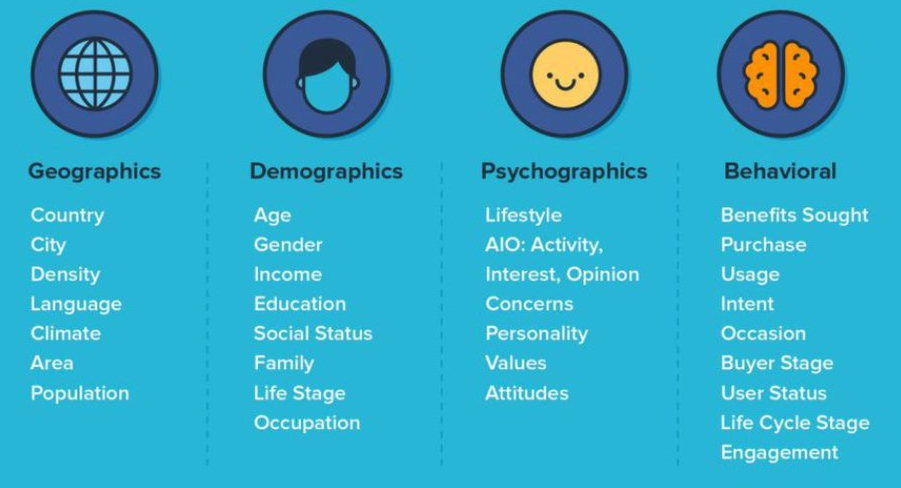

## Clustering

Clustering is one of the most common exploratory data analysis technique used to get an intuition about the structure of the data. It can be defined as the task of identifying subgroups in the data such that data points in the same subgroup (cluster) are very similar while data points in different clusters are very different.

## K-means Algorithm

Kmeans algorithm is an iterative algorithm that tries to partition the dataset into Kpre-defined distinct non-overlapping subgroups (clusters) where each data point belongs to only one group.

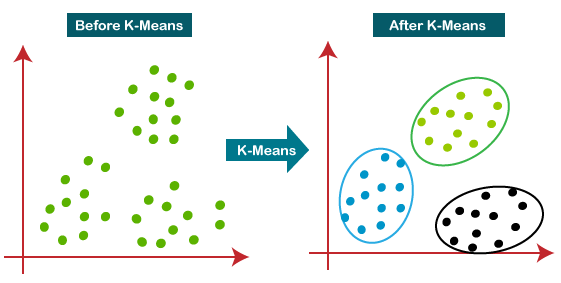

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
# The spelling of second column is incorrect, therefore I want to fix it
df.rename(columns={'Genre':'Gender'}, inplace=True)

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.shape

(200, 5)

In [6]:
# The dataset has 200 rows and 5 columns

In [7]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [8]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [9]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [10]:
df.drop(['CustomerID'], axis=1, inplace=True)

In [11]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


## Distribution

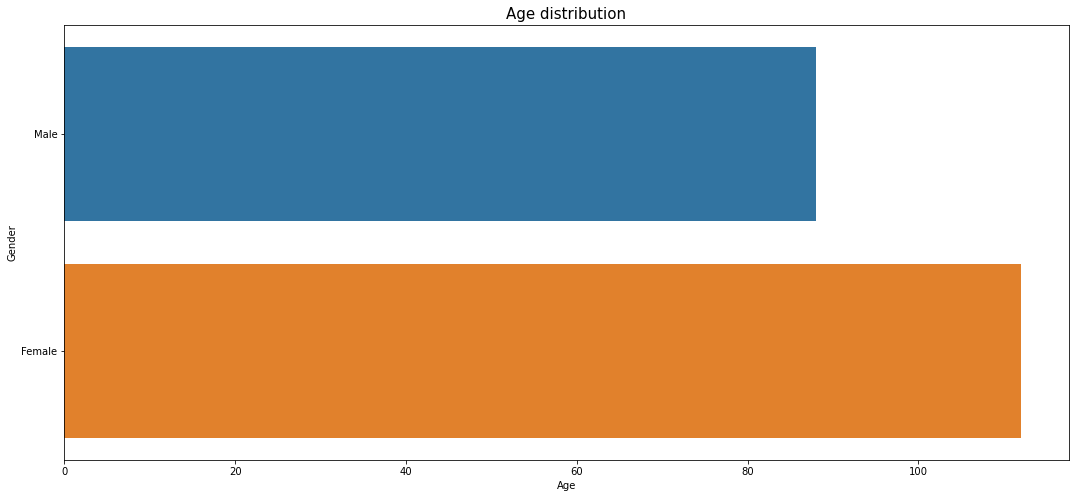

In [12]:
plt.rcParams['figure.figsize'] = (18, 8)
sns.countplot(y='Gender', data=df)
plt.title('Age distribution', fontsize = 15)
plt.xlabel('Age')
plt.show()

C:\Users\ddawiec001\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


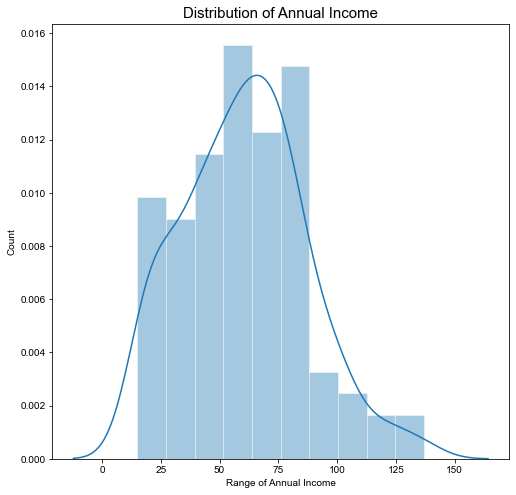

In [13]:
plt.rcParams['figure.figsize'] = (18, 8)
plt.subplot(1, 2, 1)
sns.set(style = 'whitegrid')
sns.distplot(df['Annual Income (k$)'])
plt.title('Distribution of Annual Income', fontsize = 15)
plt.xlabel('Range of Annual Income')
plt.ylabel('Count')
plt.show()

C:\Users\ddawiec001\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


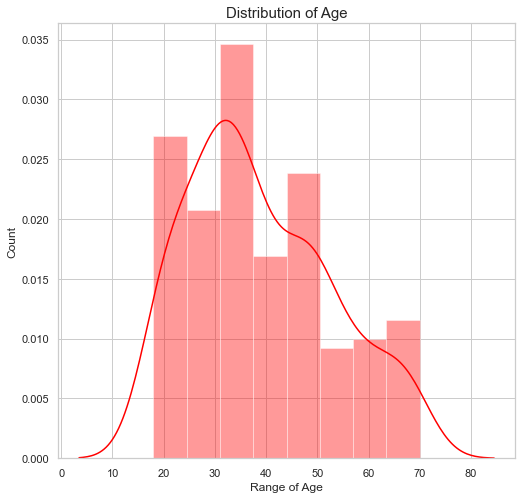

In [14]:
plt.subplot(1, 2, 2)
sns.set(style = 'whitegrid')
sns.distplot(df['Age'], color = 'red')
plt.title('Distribution of Age', fontsize = 15)
plt.xlabel('Range of Age')
plt.ylabel('Count')
plt.show()

## Distribution by Gender

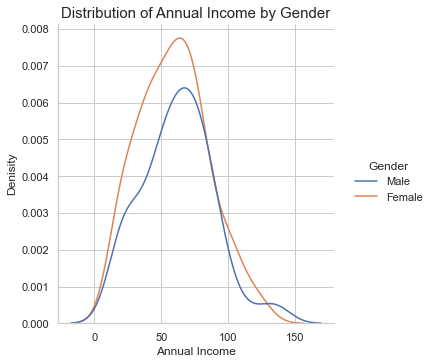

In [15]:
plt.rcParams['figure.figsize'] = (18, 8)
sns.displot(data=df, x="Annual Income (k$)", hue='Gender',kind ='kde')
plt.title('Distribution of Annual Income by Gender', fontsize = 15)
plt.xlabel('Annual Income')
plt.ylabel('Denisity')
plt.show()

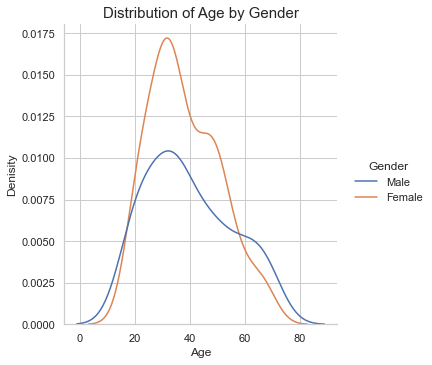

In [16]:
plt.rcParams['figure.figsize'] = (18, 8)
sns.displot(data=df, x="Age",hue='Gender',kind ='kde')
plt.title('Distribution of Age by Gender', fontsize = 15)
plt.xlabel('Age')
plt.ylabel('Denisity')
plt.show()

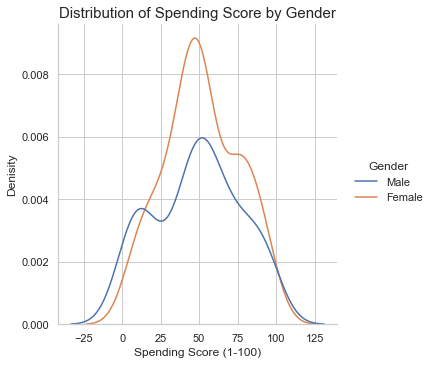

In [17]:
plt.rcParams['figure.figsize'] = (18, 8)
sns.displot(data=df, x="Spending Score (1-100)",hue='Gender',kind ='kde')
plt.title('Distribution of Spending Score by Gender', fontsize = 15)
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Denisity')
plt.show()

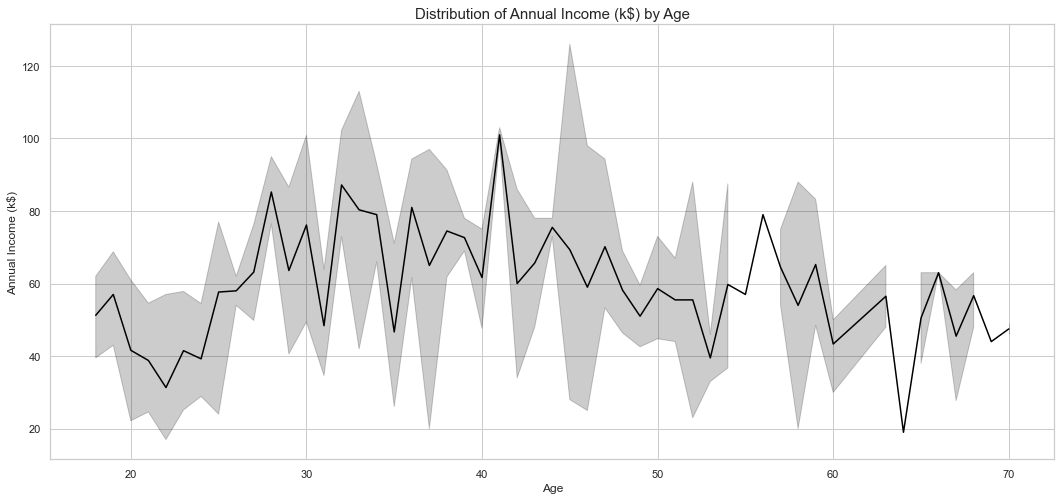

In [18]:
plt.rcParams['figure.figsize'] = (18, 8)
sns.lineplot(x = df['Age'],y = df['Annual Income (k$)'],color = 'black')
plt.title('Distribution of Annual Income (k$) by Age', fontsize = 15)
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.show()

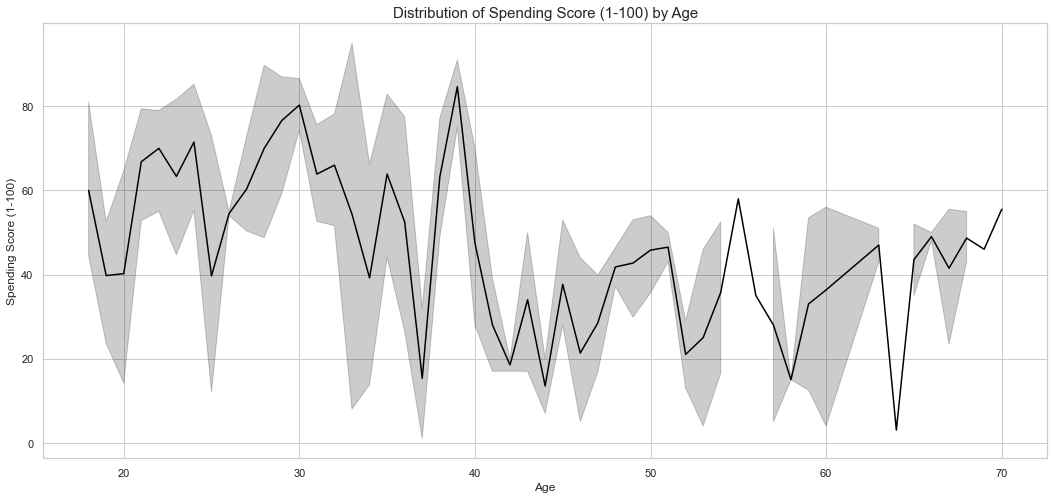

In [19]:
plt.rcParams['figure.figsize'] = (18, 8)
sns.lineplot(x =df['Age'],y = df['Spending Score (1-100)'],color = 'black')
plt.title('Distribution of Spending Score (1-100) by Age', fontsize = 15)
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.show()

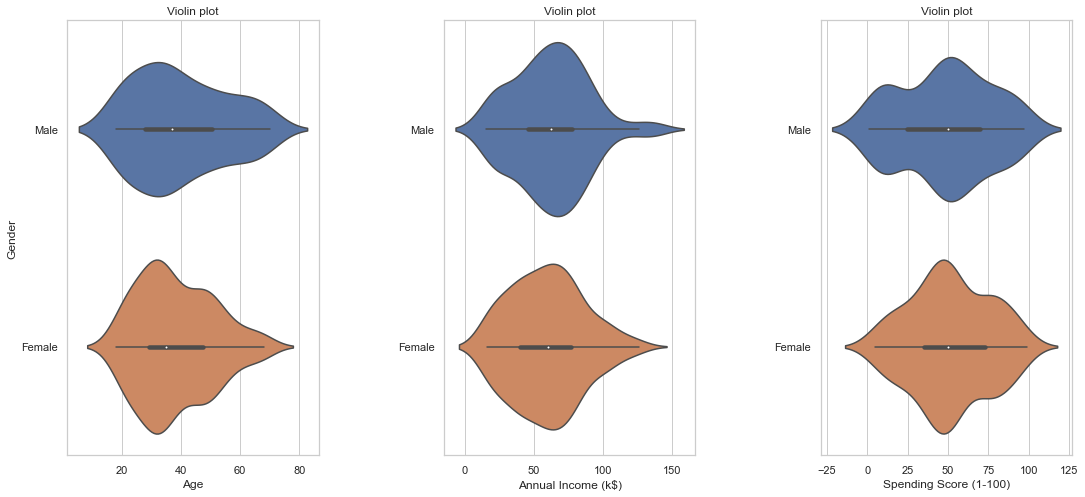

In [20]:
plt.figure(1, figsize=(18,8))
n=0
for cols in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    n+=1 
    plt.subplot(1, 3, n)
    sns.set(style="whitegrid")
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
    sns.violinplot(x = cols, y = 'Gender', data=df)
    plt.ylabel('Gender' if n == 1 else '')
    plt.title('Violin plot')
plt.show()

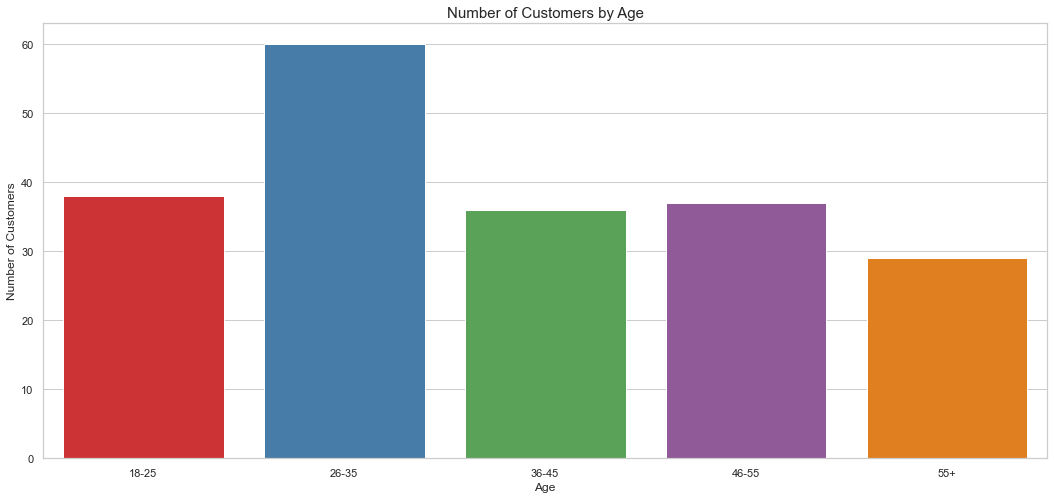

In [21]:
age_18_25 = df.Age[(df.Age >= 18) & (df.Age <= 25)]
age_26_35 = df.Age[(df.Age >= 26) & (df.Age <= 35)]
age_36_45 = df.Age[(df.Age >= 36) & (df.Age <= 45)]
age_46_55 = df.Age[(df.Age >= 46) & (df.Age <= 55)]
age_55above = df.Age[(df.Age >= 56)]

agex = ["18-25", "26-35", "36-45", "46-55", "55+"]
agey = [len(age_18_25.values), len(age_26_35.values), len(age_36_45.values), len(age_46_55.values), len(age_55above.values)]

plt.figure(figsize=(18,8))
sns.barplot(x=agex, y=agey, palette='Set1')
plt.title('Number of Customers by Age', fontsize = 15)
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.show()

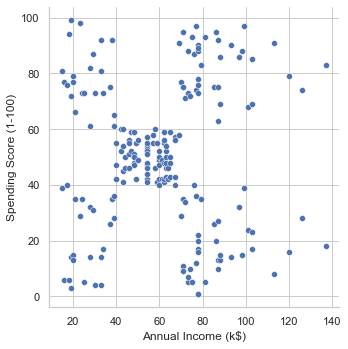

In [22]:
sns.relplot(x="Annual Income (k$)", y="Spending Score (1-100)", data=df)

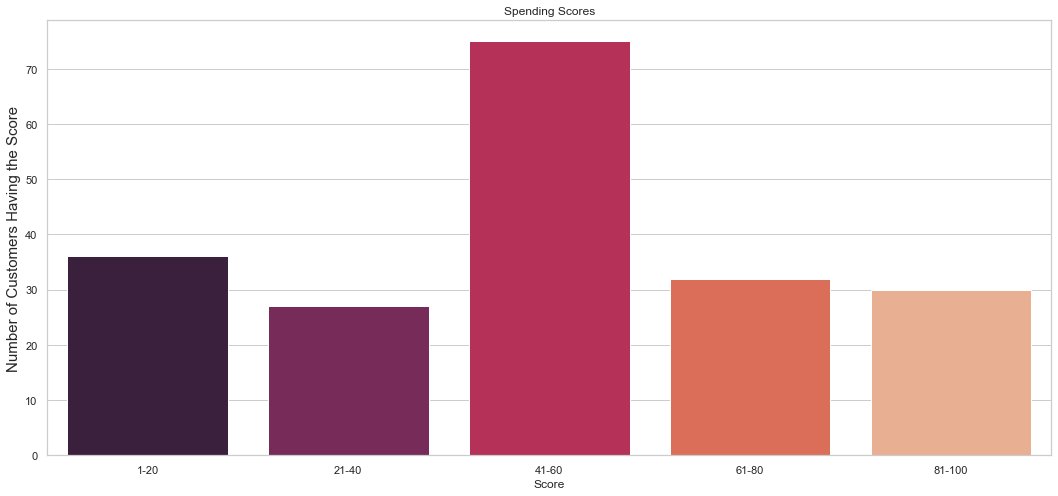

In [23]:
ss_1_20 = df['Spending Score (1-100)'][(df['Spending Score (1-100)'] >= 1) & (df['Spending Score (1-100)'] <= 20)]
ss_21_40 = df['Spending Score (1-100)'][(df['Spending Score (1-100)'] >= 21) & (df['Spending Score (1-100)'] <= 40)]
ss_41_60 = df['Spending Score (1-100)'][(df['Spending Score (1-100)'] >= 41) & (df['Spending Score (1-100)'] <= 60)]
ss_61_80 = df['Spending Score (1-100)'][(df['Spending Score (1-100)'] >= 61) & (df['Spending Score (1-100)'] <= 80)]
ss_81_100 = df['Spending Score (1-100)'][(df['Spending Score (1-100)'] >= 81) & (df['Spending Score (1-100)'] <= 100)]

ssx = ["1-20", "21-40", "41-60", "61-80", "81-100"]
ssy = [len(ss_1_20.values), len(ss_21_40.values), len(ss_41_60.values), len(ss_61_80.values), len(ss_81_100.values)]

plt.figure(figsize=(18,8))
sns.barplot(x=ssx, y=ssy, palette='rocket')
plt.title('Spending Scores')
plt.xlabel('Score')
plt.ylabel('Number of Customers Having the Score', fontsize = 15)
plt.show()

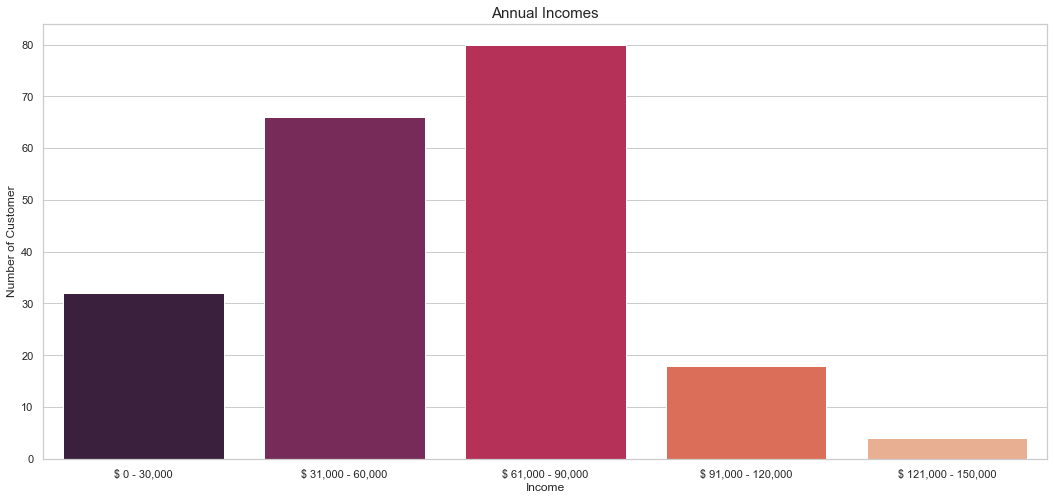

In [24]:
ai0_30 = df['Annual Income (k$)'][(df['Annual Income (k$)'] >= 0) & (df['Annual Income (k$)'] <= 30)]
ai31_60 = df['Annual Income (k$)'][(df['Annual Income (k$)'] >= 31) & (df['Annual Income (k$)'] <= 60)]
ai61_90 = df['Annual Income (k$)'][(df['Annual Income (k$)'] >= 61) & (df['Annual Income (k$)'] <= 90)]
ai91_120 = df['Annual Income (k$)'][(df['Annual Income (k$)'] >= 91) & (df['Annual Income (k$)'] <= 120)]
ai121_150 = df['Annual Income (k$)'][(df['Annual Income (k$)'] >= 121) & (df['Annual Income (k$)'] <= 150)]

aix = ["$ 0 - 30,000", "$ 31,000 - 60,000", "$ 61,000 - 90,000", "$ 91,000 - 120,000", "$ 121,000 - 150,000"]
aiy = [len(ai0_30.values), len(ai31_60.values), len(ai61_90.values), len(ai91_120.values), len(ai121_150.values)]

plt.figure(figsize=(18,8))
sns.barplot(x=aix, y=aiy, palette='rocket')
plt.title("Annual Incomes", fontsize = 15)
plt.xlabel("Income")
plt.ylabel("Number of Customer")
plt.show()

## Clustering process

C:\Users\ddawiec001\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


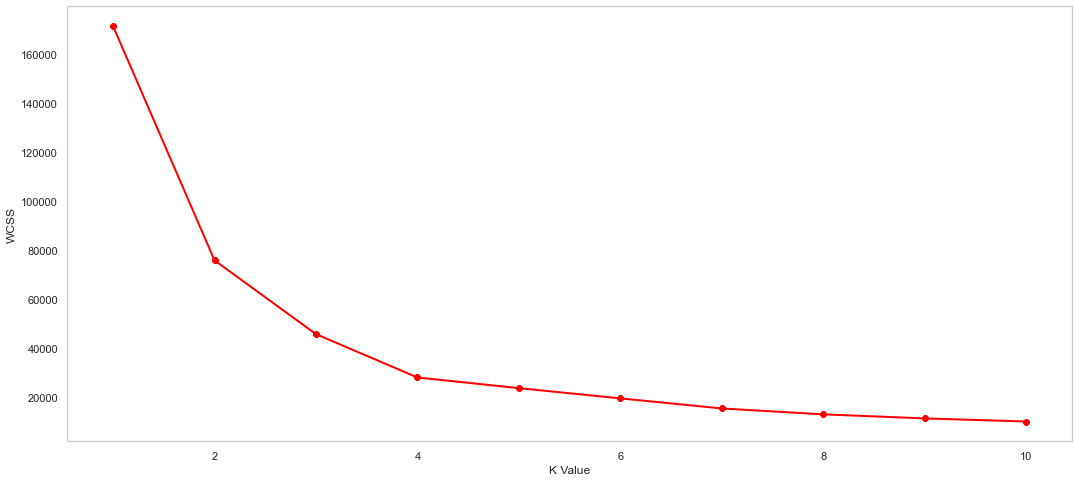

In [25]:
X1=df.loc[:, ['Age', 'Spending Score (1-100)']].values

from sklearn.cluster import KMeans
wcss = []
for k in range(1,11):
    kmeans=KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(18,8))
plt.grid()
plt.plot(range(1,11),wcss,linewidth=2 ,color='red', marker='8')
plt.xlabel('K Value')
plt.ylabel('WCSS')
plt.show()       
                  

In [26]:
kmeans = KMeans(n_clusters=4)

label = kmeans.fit_predict(X1)

print(label)

[1 3 2 3 1 3 2 3 2 3 2 3 2 3 2 3 1 1 2 3 1 3 2 3 2 3 2 1 2 3 2 3 2 3 2 3 2
 3 2 3 0 3 0 1 2 1 0 1 1 1 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0
 0 1 0 1 1 0 0 1 0 0 1 0 0 1 1 0 0 1 0 1 1 1 0 1 0 1 1 0 0 1 0 1 0 0 0 0 0
 1 1 1 1 1 0 0 0 0 1 1 1 3 1 3 0 3 2 3 2 3 1 3 2 3 2 3 2 3 2 3 1 3 2 3 0 3
 2 3 2 3 2 3 2 3 2 3 2 3 0 3 2 3 2 3 2 3 2 1 2 3 2 3 2 3 2 3 2 3 2 3 2 3 1
 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3]


In [27]:
print(kmeans.cluster_centers_)

[[55.70833333 48.22916667]
 [27.61702128 49.14893617]
 [43.29166667 15.02083333]
 [30.1754386  82.35087719]]


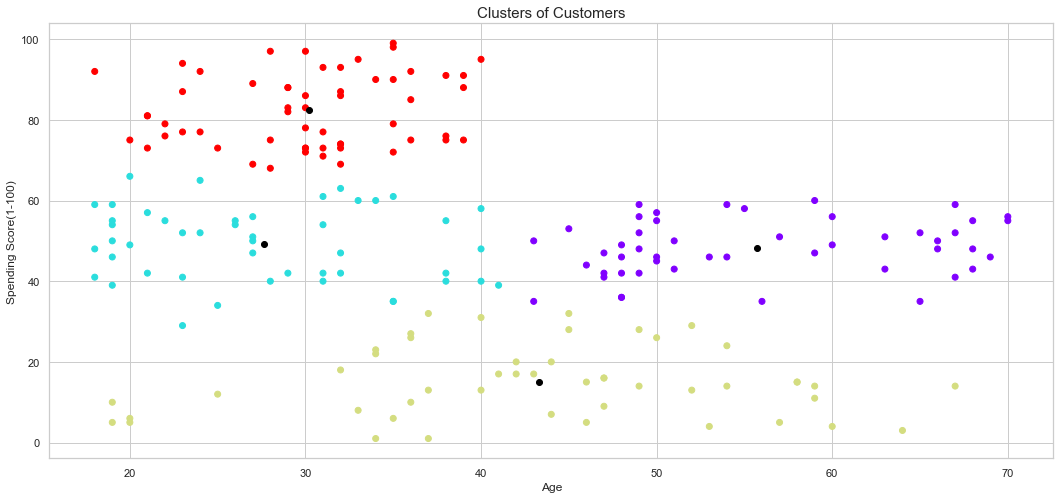

In [28]:
plt.scatter(X1[:,0],X1[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='black')
plt.title('Clusters of Customers', fontsize = 15)
plt.xlabel('Age')
plt.ylabel('Spending Score(1-100)')
plt.show()

C:\Users\ddawiec001\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


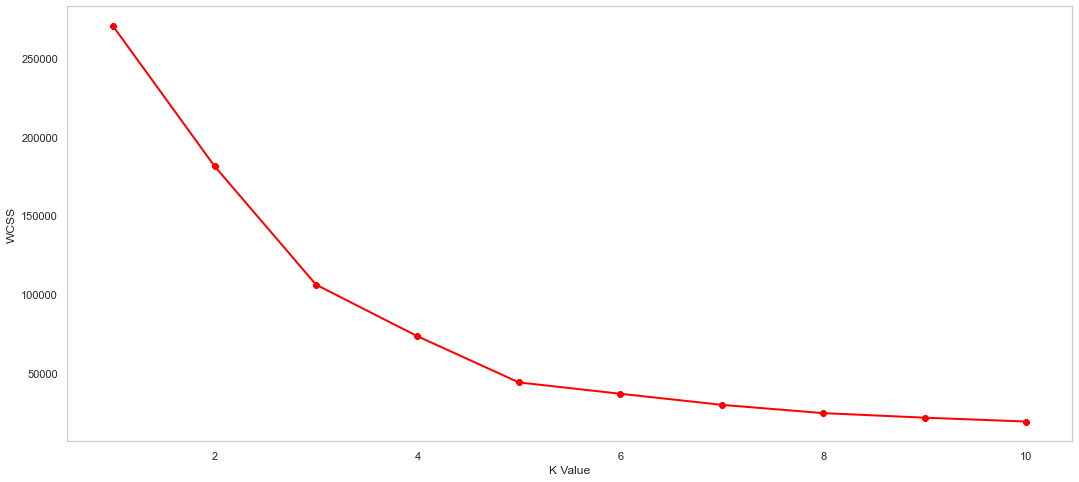

In [29]:
X2=df.loc[:, ['Annual Income (k$)', 'Spending Score (1-100)']].values

from sklearn.cluster import KMeans
wcss = []
for k in range(1,11):
    kmeans=KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X2)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(18,8))
plt.grid()
plt.plot(range(1,11),wcss,linewidth=2 ,color='red', marker='8')
plt.xlabel('K Value')
plt.ylabel('WCSS')
plt.show()                       

In [30]:
kmeans = KMeans(n_clusters=5)

label = kmeans.fit_predict(X2)

print(label)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 2 4 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 0 1 0 2 0 1 0 1 0 2 0 1 0 1 0 1 0 1 0 2 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0]


In [31]:
print(kmeans.cluster_centers_)

[[86.53846154 82.12820513]
 [88.2        17.11428571]
 [55.2962963  49.51851852]
 [25.72727273 79.36363636]
 [26.30434783 20.91304348]]


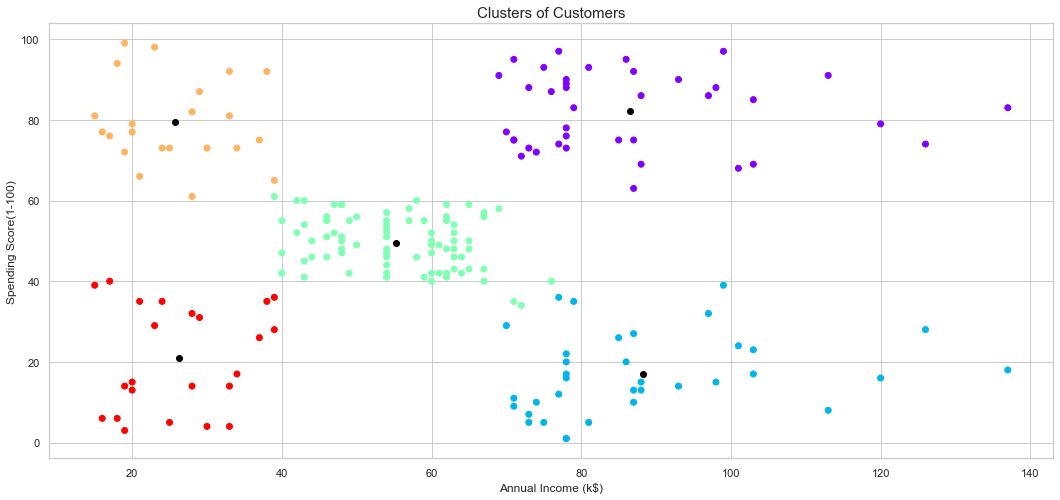

In [32]:
plt.scatter(X2[:,0],X2[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='black')
plt.title('Clusters of Customers', fontsize = 15)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score(1-100)')
plt.show()

C:\Users\ddawiec001\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


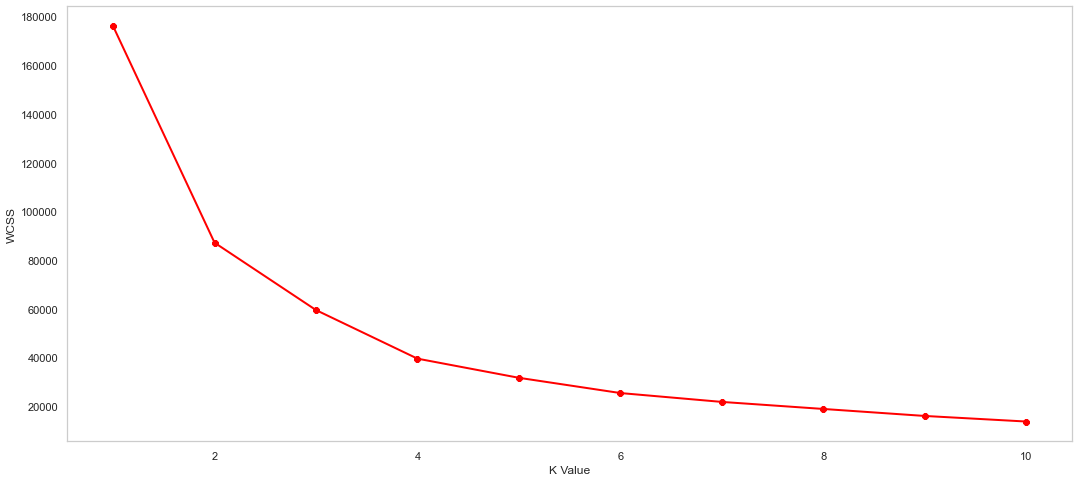

In [33]:
X3=df.loc[:, ['Age', 'Annual Income (k$)']].values

from sklearn.cluster import KMeans
wcss = []
for k in range(1,11):
    kmeans=KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X3)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(18,8))
plt.grid()
plt.plot(range(1,11),wcss,linewidth=2 ,color='red', marker='8')
plt.xlabel('K Value')
plt.ylabel('WCSS')
plt.show()                     

In [34]:
kmeans = KMeans(n_clusters=4)

label = kmeans.fit_predict(X3)

print(label)

[2 2 2 2 2 2 2 2 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 2 2 2 2
 2 2 2 0 2 0 2 0 2 0 2 2 2 0 2 2 0 0 0 0 0 2 0 0 2 0 0 0 2 0 0 2 2 0 0 0 0
 0 3 0 0 3 0 0 0 0 0 3 0 0 3 3 0 0 3 0 3 3 3 0 3 0 3 3 0 0 3 0 3 0 0 0 0 0
 3 3 3 3 3 0 0 0 0 3 3 3 3 3 3 3 3 0 3 3 3 3 3 3 3 3 3 3 3 0 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 1 3 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [35]:
print(kmeans.cluster_centers_)

[[ 55.81481481  51.77777778]
 [ 39.         106.5       ]
 [ 30.34693878  29.26530612]
 [ 31.95890411  72.95890411]]


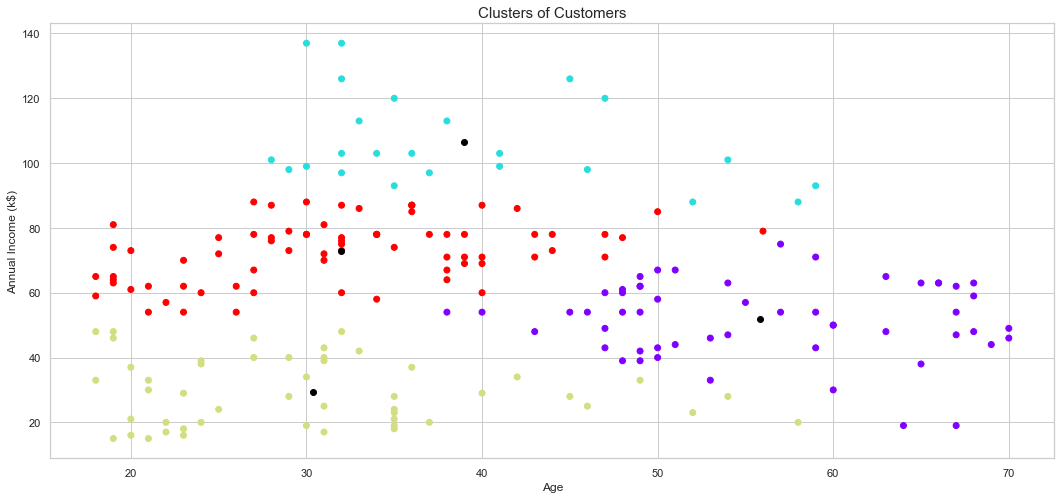

In [36]:
plt.scatter(X3[:,0],X3[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='black')
plt.title('Clusters of Customers', fontsize = 15)
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.show()